In [2]:
# Import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [3]:
import os

In [165]:
os.listdir()

['.ipynb_checkpoints', 'data', 'images', 'JupyterNotebook.ipynb']

In [153]:
data_df = pd.read_csv('data/day.csv')

In [154]:
data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [155]:
data_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [72]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## EXPLORATORY ANALYSIS OF DATA

## Question
What is season at which the bike shared is high?

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


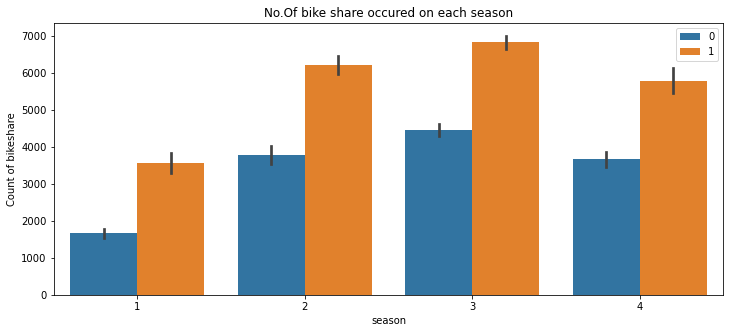

In [172]:
# plotting bar-chart

plt.figure(figsize=(12,5))
sns.barplot('season','cnt',data=data_df,hue="yr")

plt.ylabel("Count of bikeshare")
plt.title("No.Of bike share occured on each season")
plt.legend()
plt.savefig('images/image.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

In [145]:
grouped = data_df.groupby(['season'])['cnt'].mean()
grouped

season
1    2608.411111
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

## Result
From the Data Dictionary we can know that season mentioned in the data is 1:spring, 2:summer, 3:fall, 4:winter.

From the above graph and the grouped variables we can understand that the season 3 which is the fall season, has the hight number of bike share occured in both the year 2018 and 2019 

# Question
What is the influence does weekday have on the count of bikeshare?

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


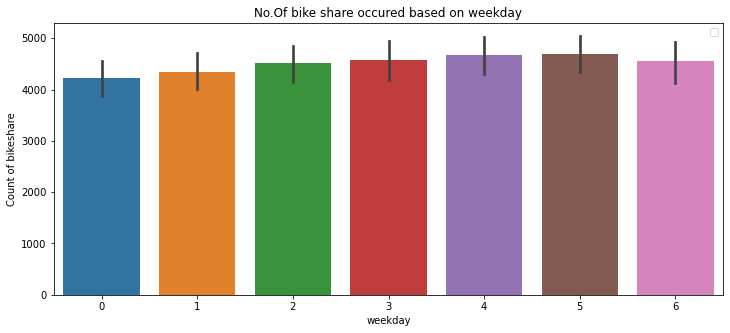

In [173]:
plt.figure(figsize=(12,5))
sns.barplot('weekday','cnt',data=data_df)

plt.ylabel("Count of bikeshare")
plt.title("No.Of bike share occured based on weekday")
plt.legend()
plt.savefig('images/graph.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

In [156]:
grouped = data_df.groupby(['weekday'])['cnt'].mean()
grouped

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4574.893204
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64

## Result
We can assume that the column weekday is represented as 0:Sunday, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, 6:Saturday. 

From the above graph and grouped variables we can understand that the Thursdays and Fridays are having the hight number of bike share occured. 

# Question 
Which month has the highest bike share occured?

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


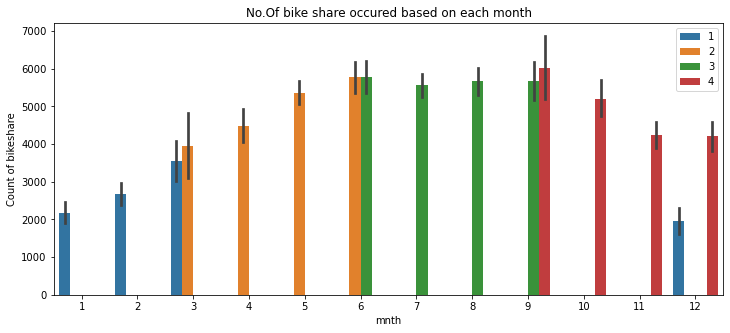

In [174]:
plt.figure(figsize=(12,5))
sns.barplot('mnth','cnt',data=data_df,hue='season')

plt.ylabel("Count of bikeshare")
plt.title("No.Of bike share occured based on each month")
plt.legend()
plt.savefig('images/graph1.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

In [158]:
grouped = data_df.groupby(['season','mnth'])['cnt'].mean()
grouped

season  mnth
1       1       2176.338710
        2       2669.964286
        3       3551.625000
        12      1954.454545
2       3       3947.954545
        4       4484.900000
        5       5349.774194
        6       5773.850000
3       6       5769.400000
        7       5563.677419
        8       5664.419355
        9       5672.704545
4       9       6024.500000
        10      5199.225806
        11      4247.183333
        12      4200.950000
Name: cnt, dtype: float64

# Result
From the Data Dictionary we can understand that the mnth column is 1-12 months.

From the above graph and grouped values based on season with month we can understand that the months with fall season has the highest number of bike share occured out of all seasons of a month.


# Question
What day does the bike share occured most with respect to workingday columnin for each season?

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


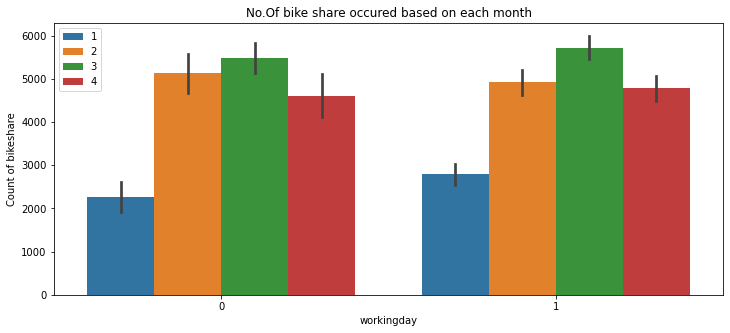

In [175]:
plt.figure(figsize=(12,5))
sns.barplot('workingday','cnt',data=data_df,hue='season')

plt.ylabel("Count of bikeshare")
plt.title("No.Of bike share occured based on each month")
plt.legend()
plt.savefig('images/graph2.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

In [159]:
grouped = data_df.groupby(['season','workingday'])['cnt'].mean()
grouped

season  workingday
1       0             2257.098361
        1             2788.495798
2       0             5142.428571
        1             4926.664062
3       0             5474.666667
        1             5718.114504
4       0             4606.210526
        1             4785.611570
Name: cnt, dtype: float64

# Result
From the above graph and grouped values we can understand that in all seasons the bikes shared is high at the working day not on a holiday especially at the fall season.


# Question
What is count of bike at each year with respect to the weather?

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


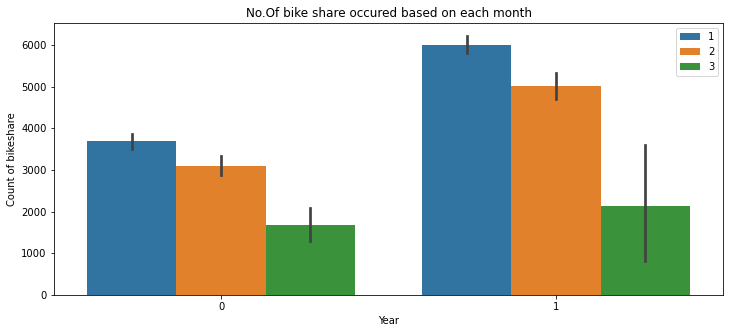

In [176]:
plt.figure(figsize=(12,5))
sns.barplot('yr','cnt',data=data_df,hue='weathersit')

plt.ylabel("Count of bikeshare")
plt.xlabel("Year")
plt.title("No.Of bike share occured based on each month")
plt.legend()
plt.savefig('images/graph3.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

In [160]:
grouped = data_df.groupby(['yr','weathersit'])['cnt'].mean()
grouped

yr  weathersit
0   1             3694.986726
    2             3088.096774
    3             1674.133333
1   1             6003.734177
    2             5017.213115
    3             2126.166667
Name: cnt, dtype: float64

# Result
From the Data Dictionary we can know that weathersit mentioned in the data is the representation of the weather, they are 1:Clear, Few clouds, Partly cloudy, Partly cloudy, 2:Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3:Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

From the above graph and grouped values we can understand that weathersit 1 has the hight number of bike share occured in both the year 2018 and 2019, that is a good weather which makes the demand for bike share to rise.


# Question
How does Temp, humid, and wind speed influences the count of bike share?

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels

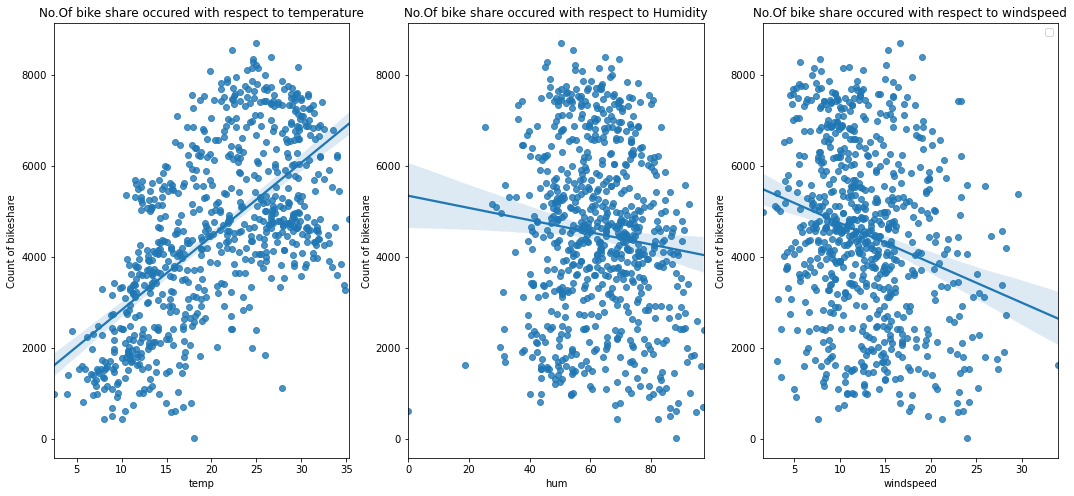

In [178]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.regplot('temp','cnt',data=data_df)
plt.ylabel("Count of bikeshare")
plt.title("No.Of bike share occured with respect to temperature")

plt.subplot(1,3,2)
sns.regplot('hum','cnt',data=data_df)
plt.ylabel("Count of bikeshare")
plt.title("No.Of bike share occured with respect to Humidity")

plt.subplot(1,3,3)
sns.regplot('windspeed','cnt',data=data_df)
plt.ylabel("Count of bikeshare")
plt.title("No.Of bike share occured with respect to windspeed")
plt.legend()
plt.savefig('images/graph5.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

# Inference
From the graph we can understand that the increase in temperature increses the demand for bike share between 20 to 30 degree.
Where as increase in wind speed and humidity decrease the demand for bike share which is a non favaroble period.

# Question
What is the senario of the count for bike share, is it increasing or decreasing?

In [180]:
data_df['cnt'] = np.log(data_df['cnt'])

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


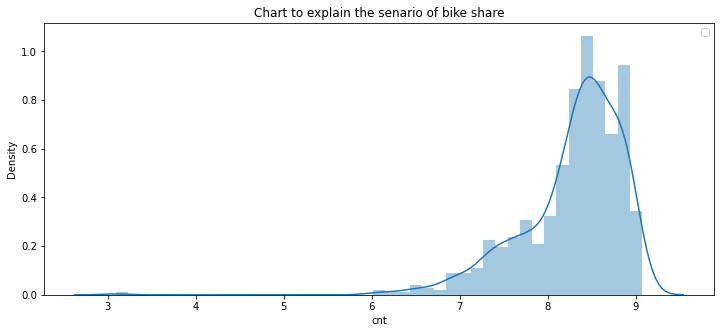

In [181]:
plt.figure(figsize=(12,5))
sns.distplot(data_df['cnt'])

plt.title("Chart to explain the senario of bike share")
plt.legend()
plt.savefig('images/graph7.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

# Result
We can see that there is a gradual increase of demand for bike share and a sudden down fall as mentioned by business due to corona lockdown

# DATA CLEANING or PREPROCESING

**Droping columns that are not useful for analysis** 

1. instant is just a column that mentions the number of row
2. dteday is removed since we already have column ye and mnth to specify      the year and month we don't need date for this analysis.
3. casual and registered are columns that specify the count of casual users and registered users, cnt is the combination for both casual and registered. So we can remove casual and registered as they can lead to data leak 

In [73]:
# droping instant column
data_df.drop(['instant'],axis=1,inplace=True)

# droping dteday column
data_df.drop(['dteday'],axis=1,inplace=True)

# droping casual, registered column
data_df.drop(['casual', 'registered'],axis=1,inplace=True)


In [74]:
data_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [75]:
data_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [76]:
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [77]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**Handling Missing values**

In [78]:
data_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

By checkting the data for null values inside each column and tried summing them. There is no null values inside the data, We can proceed with further analysis.

**Handling Outliers**

In [79]:
data_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

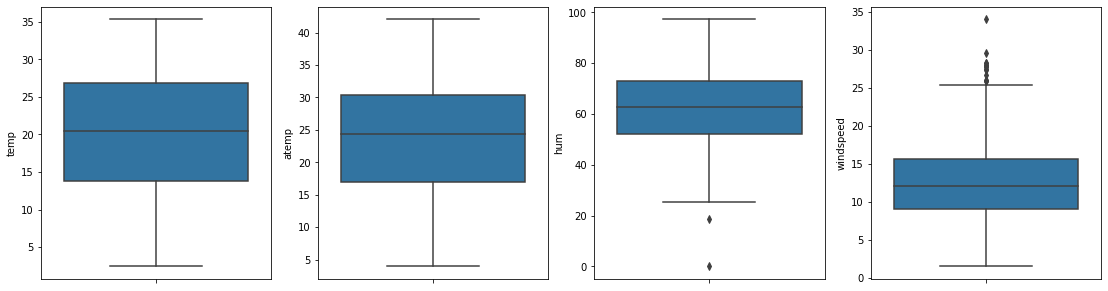

In [80]:
# Creating BOX plot to find the outliers
colmn = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(19,5))

i=1
for cols in colmn:
    plt.subplot(1,4,i)
    sns.boxplot(y=cols, data=data_df)
    i=i+1

# Inference
Outliers are data which is of high variances with other data present in that column, Which disturbs the accuracy of analysis and predictions. The more the outliers the more it affects the analysis.

From the Box plot we could see that there are no outliers which can not affect the analysis. So we are good to proceed.

# Correlation of data

In [81]:
data_df.corr()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


<AxesSubplot:>

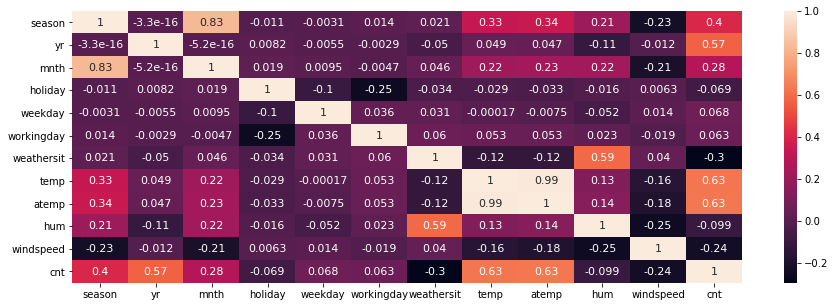

In [82]:
plt.figure(figsize=(15,5))
sns.heatmap(data_df.corr(), annot=True, annot_kws={'size':11})

# Inference 

From the Chart we can see that the columns 'temp' and 'atemp' are correlated to each other which is reason we can use one of the columns, This can save some processing time. Hence we can drop atem and proceed with temp alone

In [83]:
# droping atemp column
data_df.drop(['atemp'],axis=1,inplace=True)


In [84]:
data_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# One Hot Encoding

In [85]:
#Converting to categorical variable
col_type=['season','mnth','weekday','weathersit']

for col in col_type:
    data_df[col]=data_df[col].astype('category')
    
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [86]:
#Convert season,weekday and weathersit type as categorical
data_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

data_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

data_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

data_df.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thur',5:'fri',6:'sat'},inplace = True)

In [87]:
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,43.6957,12.522300,1600


In [88]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [89]:
#Creatings dummy columns

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column],axis=1)
    return data

#axis =1 for Column, axis =0 Row

col_type=['season','mnth','weekday','weathersit']

for col in col_type:
    data_df = one_hot_encoding(data_df,col)
    
data_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [90]:
data_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

# Spliting data for Modelimg

In [103]:
data_reg_df = pd.DataFrame.from_dict(data_df)


In [104]:
data_reg_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [105]:
data_reg_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [106]:
x = data_reg_df
y = data_reg_df['cnt']

In [107]:
x.drop(['cnt'],axis=1,inplace= True)

In [108]:
x.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [110]:
data_reg_df.shape

(730, 28)

# Modeling of data

In [111]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [112]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((584, 28), (146, 28), (584,), (146,))

In [113]:
from sklearn.preprocessing import MinMaxScaler
num_vars = ['temp','hum','windspeed']

scaler = MinMaxScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

<ipython-input-113-4952f7c9177e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
C:\Users\PC125\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-113-4952f7c9177e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [114]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
247,0,1,0,0.765327,0.814513,0.475900,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
335,0,0,1,0.317788,0.644911,0.195963,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
702,1,0,1,0.519232,0.756118,0.379454,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
440,1,0,0,0.566998,0.778874,0.220845,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
136,0,0,1,0.626185,0.863461,0.637592,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [115]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.511986,0.032534,0.672945,0.551484,0.654151,0.410017,0.229452,0.250000,0.255137,0.077055,...,0.095890,0.085616,0.147260,0.143836,0.150685,0.147260,0.138699,0.138699,0.623288,0.344178
std,0.500285,0.177566,0.469540,0.227249,0.146644,0.187249,0.420841,0.433384,0.436312,0.266907,...,0.294693,0.280037,0.354669,0.351224,0.358048,0.354669,0.345928,0.345928,0.484977,0.475507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354266,0.542745,0.276424,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.566998,0.657578,0.379465,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745598,0.757346,0.520978,0.000000,0.250000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
468,1,0,0,0.542730,0.401487,0.312138,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
148,0,0,0,0.778190,0.804036,0.362163,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
302,0,0,0,0.302721,0.555496,0.281063,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
355,0,0,1,0.444906,0.725969,0.000000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
515,1,0,1,0.795252,0.388742,0.321616,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [117]:
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.452055,0.013699,0.726027,0.510098,0.524030,0.347319,0.315068,0.260274,0.198630,0.116438,...,0.041096,0.068493,0.130137,0.143836,0.116438,0.123288,0.157534,0.150685,0.678082,0.308219
std,0.499409,0.116637,0.447530,0.251872,0.177812,0.186249,0.466142,0.440294,0.400342,0.321854,...,0.199195,0.253460,0.337612,0.352131,0.321854,0.329899,0.365558,0.358973,0.468820,0.463347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.295845,0.399097,0.201677,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.477325,0.505045,0.333102,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740084,0.644612,0.421968,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
lm = LinearRegression()

model = lm.fit(X_train,Y_train)



In [119]:
a = model.coef_
b = model.intercept_
print("Estimated model slope: ",a)
print("Estimated model intercept: ",b)

Estimated model slope:  [ 1.96268071e+03  6.55567140e+15  6.55567140e+15  3.78450000e+03
 -1.41000000e+03 -1.16100000e+03 -9.94125000e+02  1.09250000e+02
  7.63875000e+02 -1.14113281e+02 -4.43250000e+02 -6.51972656e+01
 -1.74625000e+02 -4.18875000e+02 -2.95000000e+01  3.45687500e+02
  2.45937500e+02 -5.58250000e+02  1.44125000e+02  5.52250000e+02
 -2.08500000e+02  6.55567140e+15  6.55567140e+15 -8.10000000e+01
 -1.42187500e+02 -1.15000000e+01  2.12625000e+03  1.68175000e+03]
Estimated model intercept:  -6555671399926555.0


In [120]:
Y_train_pred = model.predict(X_train)


In [121]:
Y_train_pred


array([ 3779.,  3657.,  5870.,  4970.,  3452.,  3349.,  1155.,  3611.,
        2465.,  5170.,  7145.,  5106.,  6551.,  3608.,  6319.,  5893.,
        1838.,  3539.,  4851.,  2045.,  7733.,  6995.,  3161.,  6954.,
        1082.,  4549.,  4377.,  7075.,  4464.,  3977.,  3714.,  2451.,
         417.,  3314.,  6687.,  7336.,  4812.,  6654.,  5705.,  5581.,
        5117.,  1127.,  6743.,  4363.,  2375.,  5341.,  3368.,  2144.,
        6271.,  4375.,  1222.,  5348.,  4838.,  4473.,  6977.,  5178.,
        6587.,  1531.,  4511.,  3045.,  6427.,  4154.,  3073.,  5296.,
        3884.,  4845.,  4791.,  2969.,  2882.,  6180.,  6665.,  3701.,
        2644.,  4872.,  4915.,  4317.,   911.,  7227.,  5619.,  5442.,
        3797.,  3105.,  5327.,  3054.,  4151.,  6120.,  3884.,  6765.,
        7291.,  3301.,   707.,   604.,  6579.,  6871.,  4548.,  5310.,
        6740.,  6465.,  3717.,  4844.,  5031.,  1484.,  1645.,  1704.,
        1831.,  4713.,  6389.,  6523.,  2684.,   935.,   991.,  5053.,
      

# Inference
From the prediction we could see that there is increse in demand for bike share, and there are few factors like season and weather afecting the demand. But once everything comes back to normal there is a good rise in demand

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

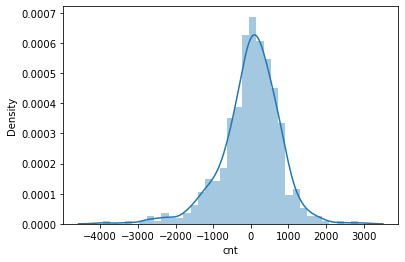

In [129]:
# plotting to find error terms
sns.distplot(Y_train-Y_train_pred)

Errors are distributed normally around mean 0. So it looks fine with the prediction.

In [122]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, Y_train_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 773.0082


In [124]:
# R2 score calue
from sklearn.metrics import r2_score
score=r2_score(Y_train, Y_train_pred)
print ("R2 Score value: {:.4f}".format(score))

R2 Score value: 0.8434


# Inference
We can see that R2 Score is less than 1 and between 0.65 - 0.95. It is said to be a good model. We have successfully done the prediction.

Test data

In [133]:
# Processing the same steps for test data
model = lm.fit(X_test,Y_test)

In [134]:
a = model.coef_
b = model.intercept_
print("Estimated model slope for test: ",a)
print("Estimated model intercept for test: ",b)

Estimated model slope for test:  [ 2223.93386731  -330.58793503   140.74600717  2395.27413112
 -1218.02151529 -1218.69124308  -689.36134081  -342.73631339
   628.06055163   -40.1665297  -1062.34130586  -969.02279349
 -1329.1565502   -699.04640581   464.60723772  -649.86953381
   229.98647262  -713.29621995  -564.26449185   181.90583607
  -107.58070994   256.51114336   -66.6692155    189.92973821
  -136.48253282  -203.19956133   907.0379414    428.42639755]
Estimated model intercept for test:  2990.68518059513


In [135]:
Y_test_pred = model.predict(X_test)

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

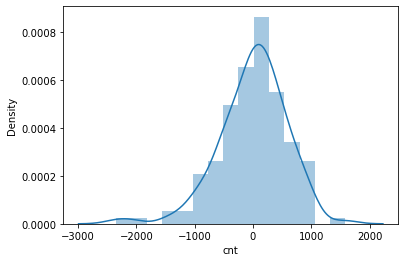

In [136]:
#Plotting for test data to find error term
sns.distplot(Y_test-Y_test_pred)

Errors are distributed normally for test data around mean 0. So it looks fine with the prediction.

In [137]:
# Calculate and print Root Mean Square Error(RMSE)

mse = mean_squared_error(Y_test, Y_test_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 579.0720


In [138]:
# R2 score calue

score=r2_score(Y_test, Y_test_pred)
print ("R2 Score value: {:.4f}".format(score))

R2 Score value: 0.9020


# Inference
We can see that R2 Score for test data is less than 1 and between 0.65 - 0.95. It is said to be a good model. We have successfully done the prediction.

# Conclusion

The demand for bike share can be predicted with the help of the features like:-
Season - This is the factor that affects mostly, the demand increases in the fall season.

Holiday - Since there is an holiday the people using bike sharing are less while on a working day there is high use.

Temperature - This is also an important factor, When the temperature 
increases to warm and good the bike shared is high and when the temperature reduces to cold and freezing the bike shared is decreases.
Humidity - It is also one of the factor helps in predicting, when the humidity reduces the bike demand has incresed.
Weather - It is same as season, when the wather is good the bike share demand was high but the the weather turns to bad or severe the demand reduces


When comparing the data of demand for the year 2018 and 2019 there is a good increase in demand for bike share. Which shows a good response among the customer using this bikeshare. This helps us to have a clear picture that there is a definite posibility of rice in business.

